# Data Visualization
## Summary
- getting familiar with plotting with matplotlib
 - line space
 - scatter plot
- introduction to basic models
 - mean
 - linear regression
  - familiar with intercept and coefficient for line through and their slope
 - polynomial linear regression
 - unconstrained descision tree

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

## Creating a basic plot (scatter of sind wave + noise)

In [2]:
# input feature
x = np.linspace(0, 2*np.pi, 100)
# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

# target variable
y = np.sin(x) + noise

In [3]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


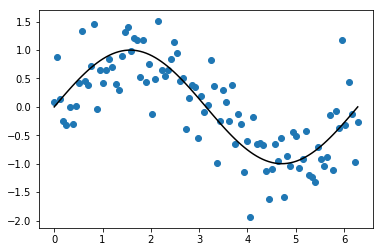

In [4]:
plt.scatter(df['x'], df['y'])

plt.plot(df['x'], np.sin(df['x']), color='k')

## Models
### Mean Model 

In [5]:
pred = np.mean(df.y)

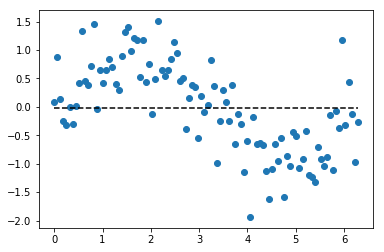

In [6]:
plt.scatter(df.x, df.y)
plt.plot(df.x, [pred] * len(df.x), 'k--')

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression as lr

In [8]:
df.shape

(100, 2)

In [9]:
linear_model = lr()

# separate input and target variable
features = df.drop('y', axis=1)
target = df.y

linear_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Intercept and Coefficient 
Intercept = that the line is fitted through the center of mass of the data points. Als known as the y value e.g.
![Image of intercept](https://upload.wikimedia.org/wikipedia/commons/7/77/Okuns_law_quarterly_differences.svg)
Coefficient = the variable infront of x

In [10]:
print('Intercept: {}'.format(linear_model.intercept_))
print('Coefficient: {}'.format(linear_model.coef_))

Intercept: 0.8238675120273313
Coefficient: [-0.26773758]


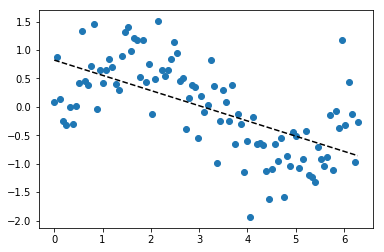

In [11]:
plt.scatter(df.x, df.y)

plt.plot(df.x, linear_model.predict(features), 'k--')

### Polynomial Linear Regression

In [12]:
def fit_and_plot_model(df, model):
    features = df.drop('y', axis=1)
    target = df.y
    model.fit(features, target)
    plt.scatter(df.x, df.y)
    plt.plot(df.x, model.predict(features), 'k--')

In [13]:
def fit_polynomial_model(df, model, max_polynomial=1):
    df_copy = df.copy()
    if max_polynomial == 1:
        fit_and_plot_model(df_copy, model)
    else:
        for power in range(2, max_polynomial+1):
            df_copy['x{}'.format(power)] = np.power(x, power)
        fit_and_plot_model(df_copy, model)

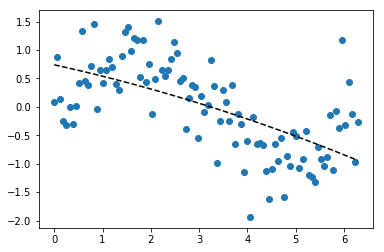

In [14]:
# 2nd order
fit_polynomial_model(df, lr(), 2)

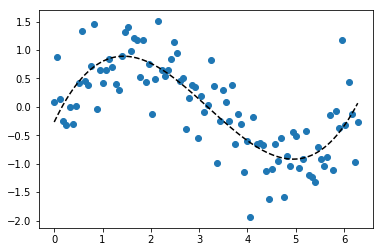

In [15]:
# 3rd order
fit_polynomial_model(df, lr(), 3)

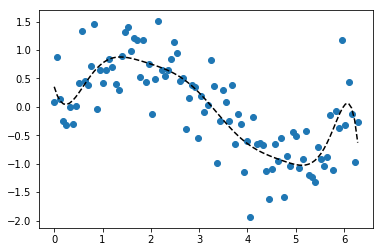

In [16]:
fit_polynomial_model(df, lr(), 10)

### Unconstrained Descision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor as dtr

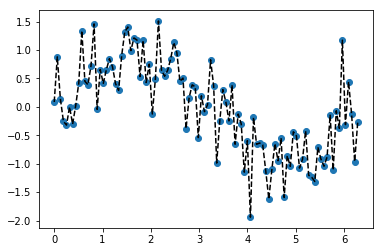

In [18]:
fit_and_plot_model(df, dtr())

In [19]:
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448
